In [61]:
import pandas as pd
import seaborn as sns
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [62]:
sns.set(rc={"figure.figsize": (14,8)})

In [95]:
df = pd.read_csv('Indicadores.csv')
df = df.sort_values(by='Periodo')
df = df.reset_index(drop=True)

## Procedemos a leer los datos para conocer sus caracteristicas

In [96]:
df.index = pd.to_datetime(df['Periodo'])
df.drop(columns='Periodo',inplace=True)
df

,Valor
Periodo,
1993-01-01,60.407691
1993-02-01,61.022521
1993-03-01,63.943249
1993-04-01,61.865984
1993-05-01,63.612900
...,...
2022-03-01,111.940152
2022-04-01,109.529866
2022-05-01,114.442424


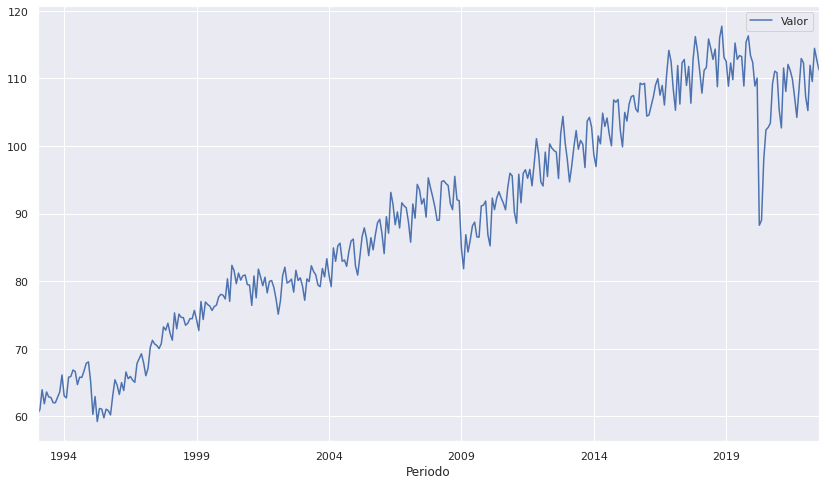

In [97]:
df.plot()

## *Según la propia gráfica es posible notar que se no se tienen una tendencia estacionaria, puede verse como aumenta el Valor a lo largo del periodo.*

In [98]:
def is_stationary(df):
	val = df.values
	result = adfuller(val)
	if result[1] <= 0.05:
		print('Is stationary')
	else:
		print('Is non starionary')
	print('p_value: '+ str(result[1]))
	return

In [99]:
is_stationary(df['Valor'])

Is non starionary
p_value: 0.784837289790252


In [100]:
annual = np.log(df['Valor']) - np.log(df['Valor'].shift(12))
annual = annual.dropna()
is_stationary(annual)

Is stationary
p_value: 0.0032602635598127376


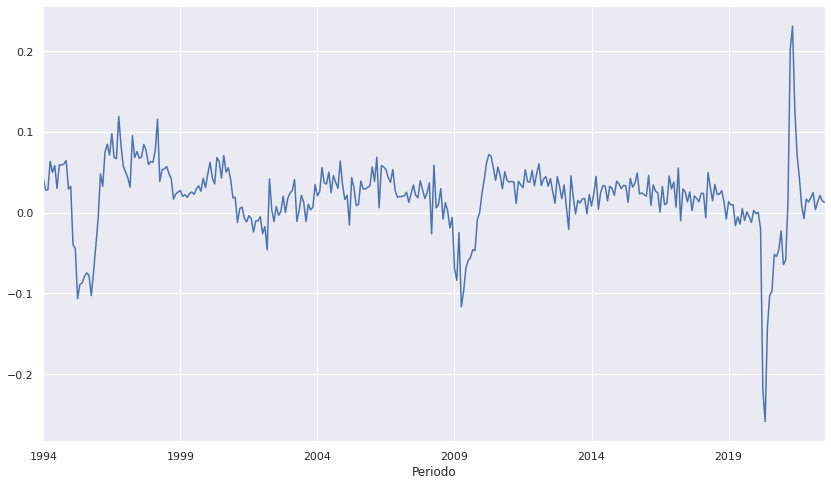

In [101]:
annual.plot()

## *Al realizar calculos de logaritmo y comparandolo de manera anual, se obtienen datos que representan mayormente una estacionalidad, dado que el p value tiende a ser menor que 0.05, decimos entonces que presenta una estacionalidad.*

### *Por otro lado, dado que tenemos un bajo valor de p value, es posible usar modelos de ARIMA-SARIMA y comenzar usando variable de D y d. Como primera opción decimos entonces que D = 1 y d = 0*

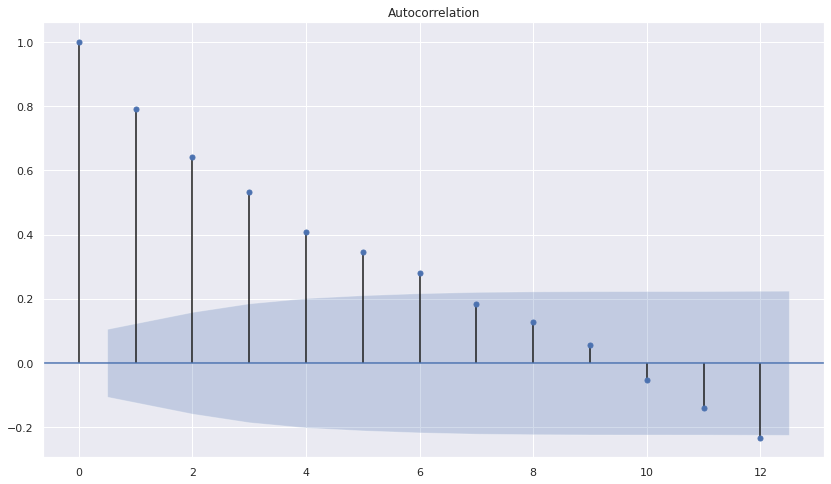

In [102]:
sm.graphics.tsa.plot_acf(annual.values.squeeze(), lags=12)
plt.show()

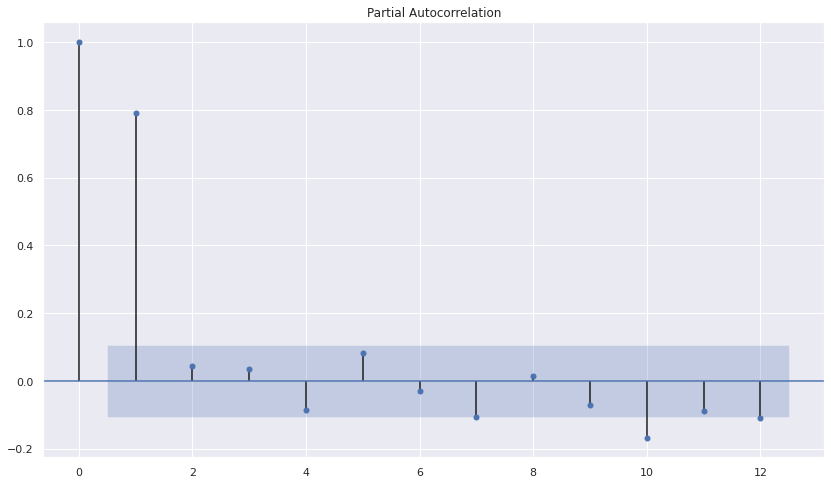

In [103]:
sm.graphics.tsa.plot_pacf(annual.values.squeeze(), lags=12, method="ywm")
plt.show()

## *Analizando los gráficos de autocorrelación es posible observar el decrecimiento que se tiene mediante cada lag, para ser más exactos alrededor del lag 7 a los anteriores, se dice que tiene una significancia mayor al 95%.*

## *Aunado a lo mencionado, la gráfica de autocorrelación parcial muestra valores explicativos únicamente en el primer lag, por lo cual se considera valores de p = 1 y q = 0.*

## Variables ARIMA y SARIMA

In [104]:
model = SARIMAX(np.log(df['Valor']), order=(1,0,0),seasonal_order =(0,1,0,12),trend='c',simple_differencing=True)
history = model.fit()
history.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         DS12.Valor   No. Observations:                  343
Model:             SARIMAX(1, 0, 0)x(0, 0, 0, 12)   Log Likelihood                 741.706
Date:                            Sat, 26 Nov 2022   AIC                          -1477.413
Time:                                    21:26:07   BIC                          -1465.899
Sample:                                01-01-1994   HQIC                         -1472.827
                                     - 07-01-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0041      0.002      2.741      0.006       0.001       0.007
ar.L1          0.7905      0.021     36.847      0.000       0.748       0.833
sigma2         0.0008   2.09e-05     36.988      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.42   Jarque-Bera (JB):              3075.60
Prob(Q):                              0.52   Prob(JB):                         0.00
Heteroskedasticity (H):               2.24   Skew:                            -0.44
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## *En el siguiente modelo SARIMAX es posible notar que, en el crecimiento anual del mes pasado sobre el actual hay un 79.05% de impacto, dicho de otra manera, por cada 1% del crecimeinto anual del mes anterior se estima un crecimiento anual en el mes actual de un 79.05%. Esto también indica que se tiene un drift significativo, y dado que es positivo, se estima que crecerá en base al tiempo.*

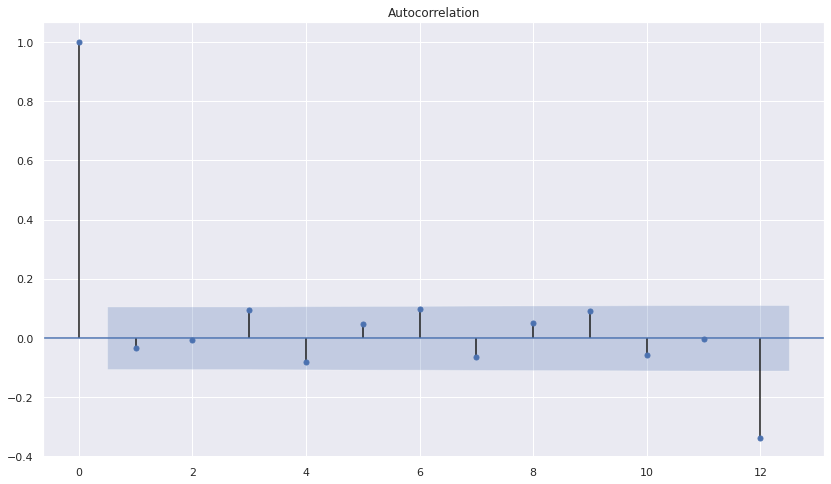

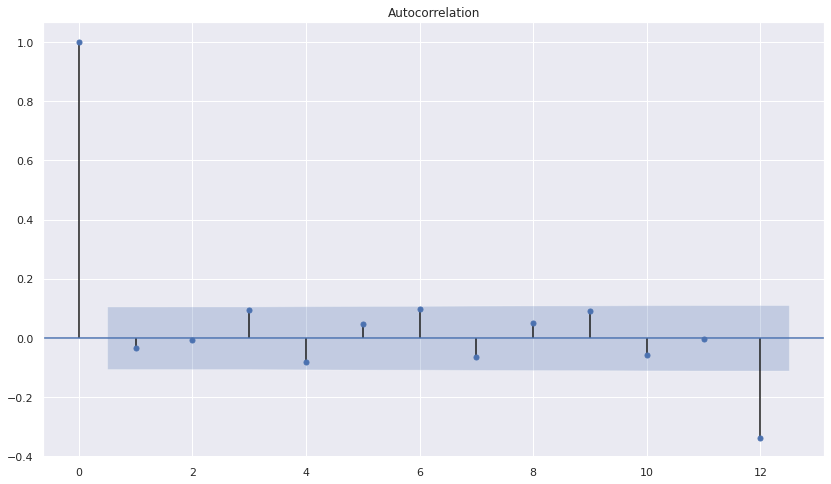

In [105]:
plot_acf(history.resid, lags = 12)

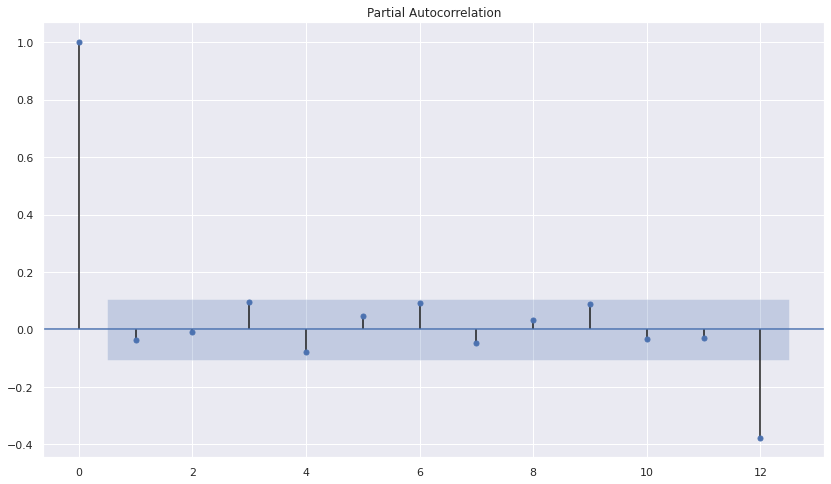

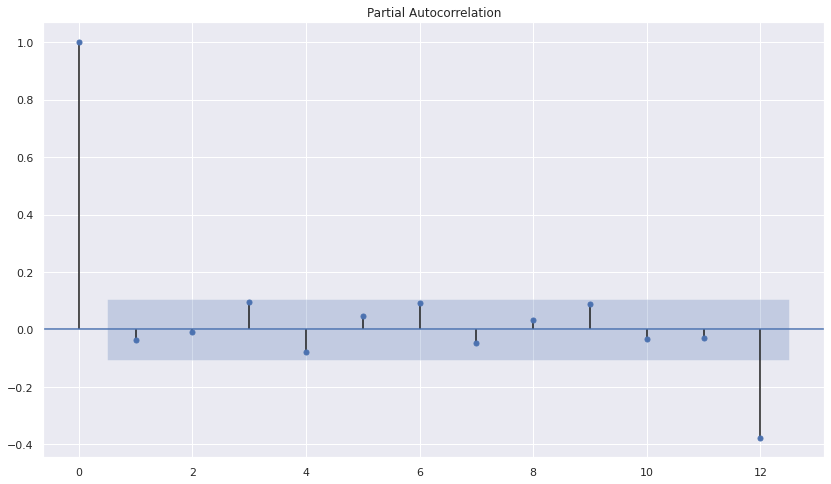

In [106]:
plot_pacf(history.resid, lags = 12)

## *Ahora, para el segundo modelo se pretende cambiar el parámetro de Q a Q = 1, ya que se denota que el lag 12 sale del rango.*

In [107]:
model2 = SARIMAX(np.log(df['Valor']), order=(1,0,0),seasonal_order =(0,1,1,12),trend='c',simple_differencing=True)
history2 = model2.fit()
history2.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                           DS12.Valor   No. Observations:                  343
Model:             SARIMAX(1, 0, 0)x(0, 0, [1], 12)   Log Likelihood                 805.821
Date:                              Sat, 26 Nov 2022   AIC                          -1603.642
Time:                                      21:26:11   BIC                          -1588.291
Sample:                                  01-01-1994   HQIC                         -1597.528
                                       - 07-01-2022                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0025      0.000      6.274      0.000       0.002       0.003
ar.L1          0.8793      0.019     46.540      0.000       0.842       0.916
ma.S.L12      -0.8405      0.047    -17.882      0.000      -0.933      -0.748
sigma2         0.0005   1.33e-05     38.347      0.000       0.000       0.001
===================================================================================
Ljung-Box (L1) (Q):                   4.60   Jarque-Bera (JB):              7790.41
Prob(Q):                              0.03   Prob(JB):                         0.00
Heteroskedasticity (H):               2.08   Skew:                            -2.30
Prob(H) (two-sided):                  0.00   Kurtosis:                        25.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

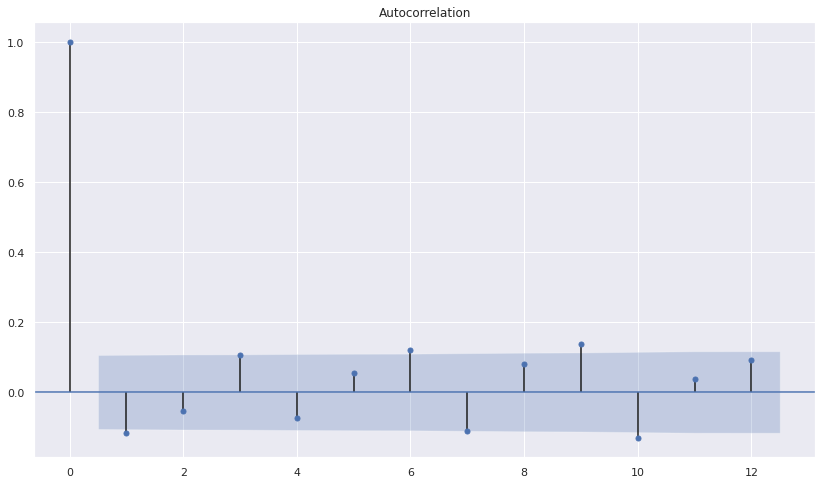

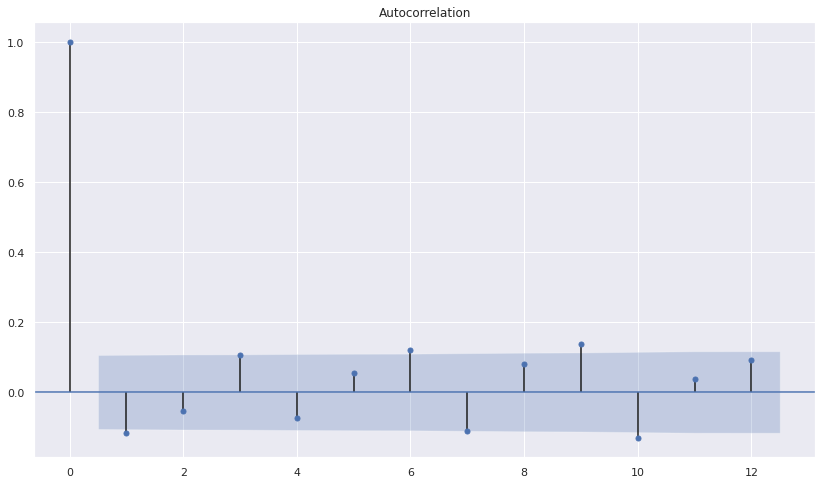

In [108]:
plot_acf(history2.resid, lags = 12)

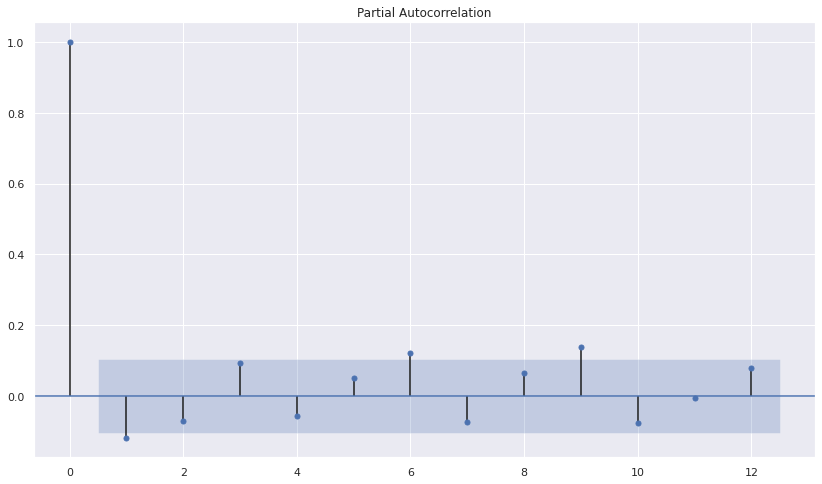

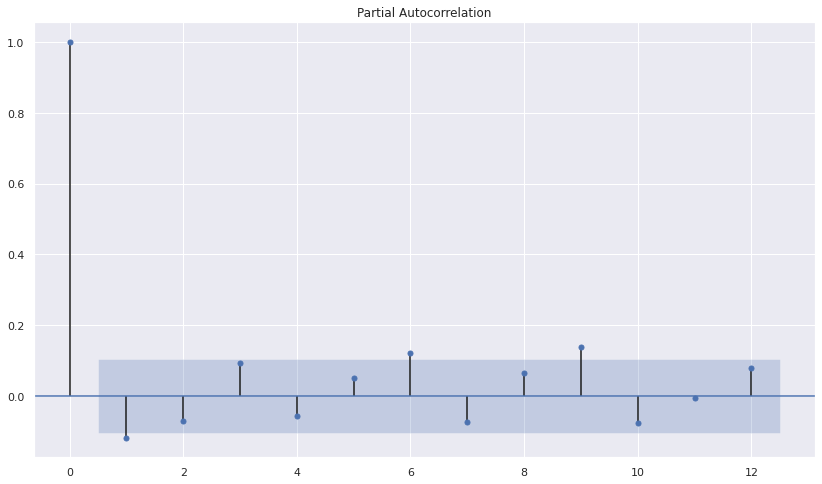

In [109]:
plot_pacf(history2.resid, lags = 12)

## *Finalmente es posible ajustar el lag 12 para que entre en el rango, sin embargo, existen más lags que pueden ser ajustados, principalmente el lag 1, donde se denota una autocorrelación negativa, es decir, se encuentra fuera de rango, esto es posible corregir si se modifica q a q = 1.*

In [116]:
model3 = sm.tsa.statespace.SARIMAX(df['Valor'], order = (1,0,1), seasonal_order = (0,1,1,12),  trend = 'c',  simple_differencing = True)
history3 = model3.fit()
history3.summary()


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         DS12.Valor   No. Observations:                  343
Model:             SARIMAX(1, 0, 1)x(0, 0, 1, 12)   Log Likelihood                -743.398
Date:                            Sat, 26 Nov 2022   AIC                           1496.795
Time:                                    21:26:48   BIC                           1515.984
Sample:                                01-01-1994   HQIC                          1504.439
                                     - 07-01-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2018      0.048      4.187      0.000       0.107       0.296
ar.L1          0.8855      0.026     34.027      0.000       0.834       0.936
ma.L1         -0.1551      0.040     -3.921      0.000      -0.233      -0.078
ma.S.L12      -0.8131      0.043    -19.048      0.000      -0.897      -0.729
sigma2         4.2908      0.107     39.975      0.000       4.080       4.501
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):             15172.55
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               4.69   Skew:                            -3.24
Prob(H) (two-sided):                  0.00   Kurtosis:                        34.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

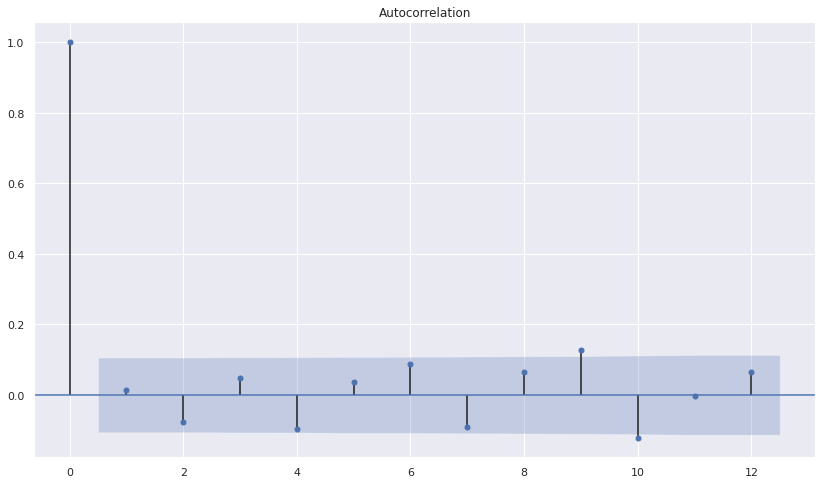

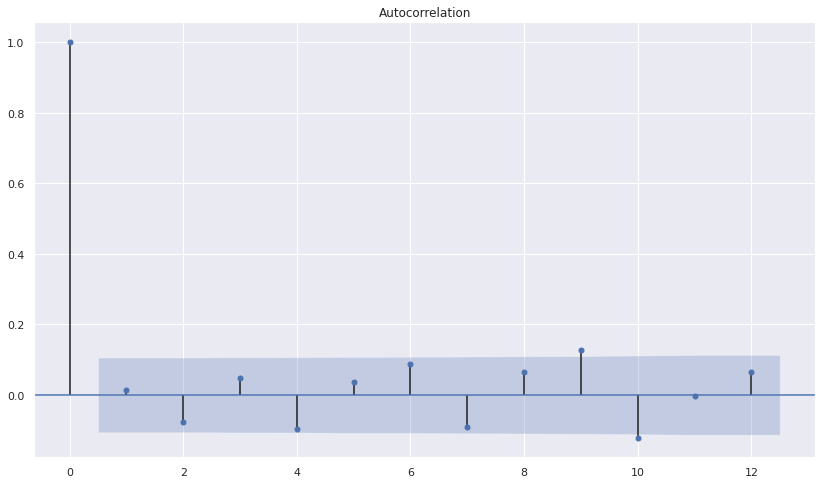

In [111]:
plot_acf(history3.resid, lags = 12)

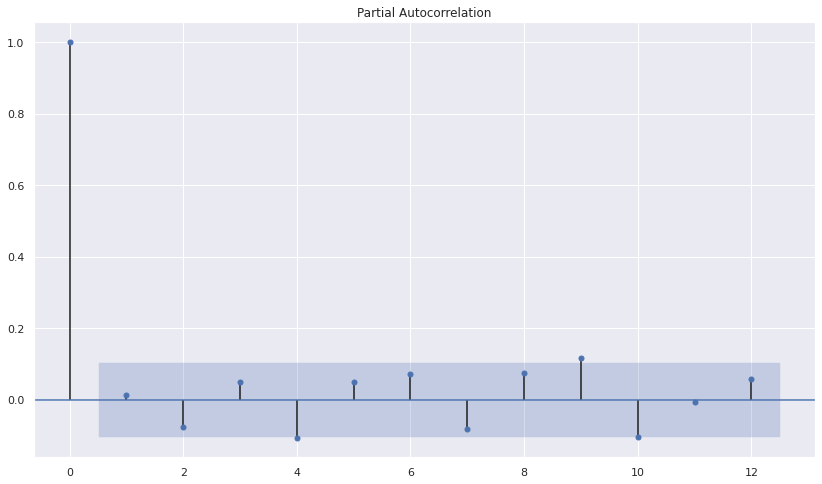

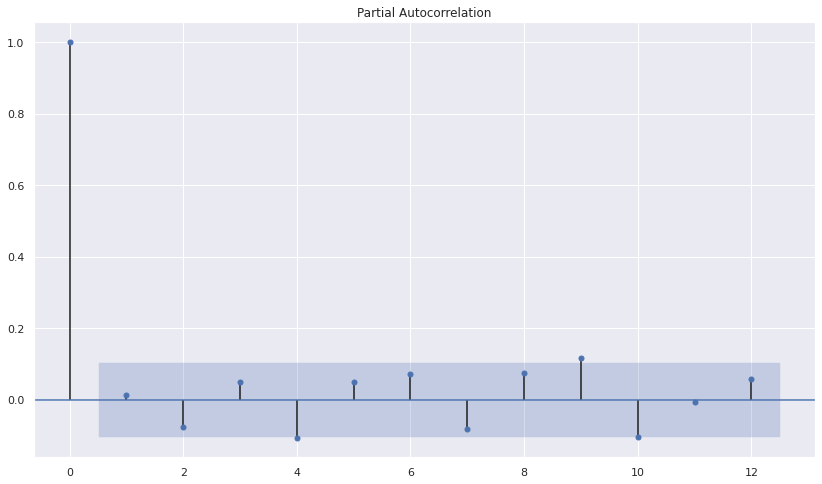

In [112]:
plot_pacf(history3.resid, lags = 12)

## *Ahora que ya ha sido posible ajustar los lags dentro del rango, podemos decir que todas se encuentran menor al 95% de significancia, por lo que ya no se tendrán problemas graves en cuanto al "noise" dentro del modelo.*

## *Analizando algunas mediciones de los coeficientes del modelo, se encuentra que las variables tienen gran importancia para el modelo puesto que su p-value es el mínimo. También es importante mencionar que los valores del mes pasado han tenido una precisión del 88.55% para predecir el crecimiento económico anual del mes actual, aunado a esto, el valor de z es de 34, lo cual lo hace muy significativo.*

## *Finalmente, para realizar las predicciones se extrae la formula del modelo final, donde el punto será observar los resultados de las predicciones de acuerdo a los valores reales*

In [148]:
y = np.log(df['Valor'])
y_pred = 0.2018 + 0.8855*df['Valor'].shift(1) + 0.1551*df['Valor'].shift(1) - 0.8131*(-0.5/0.8131)
df['Prediccion'] = y_pred

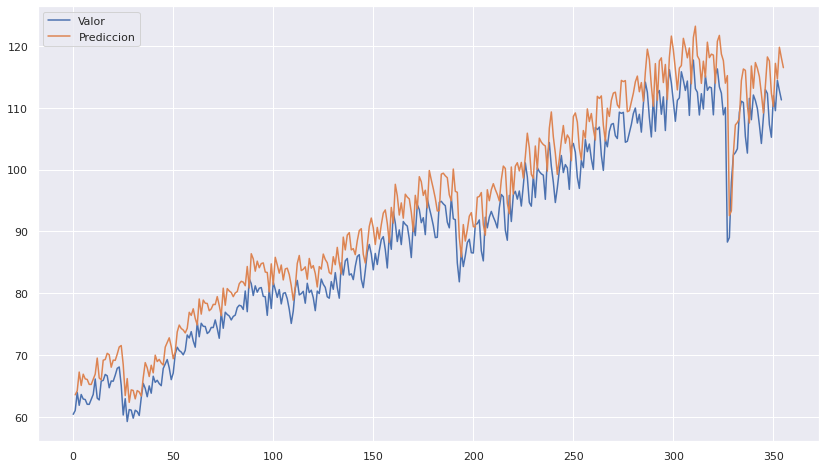

In [149]:
df[['Valor','Prediccion']].plot()